In [1]:
from pathlib import Path

In [2]:
# Setting the path 
data_path = Path('dataset.csv')

In [3]:
#Reading the Data and copying of the data to work on named as df
import pandas as pd
df_original = pd.read_csv(data_path)
df= df_original 


In [4]:
df.head(5)

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.73,0,Caucasian,M,180.3,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.42,0,Caucasian,F,160.0,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0


In [5]:
df.shape

(91713, 85)

In [6]:
df.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

In [7]:
# Seperating the columns based on their data types.
original_categorical_cols = df.select_dtypes(include='object').columns
original_numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

## Stats part begins

In [8]:
df.columns

Index(['encounter_id', 'patient_id', 'hospital_id', 'age', 'bmi',
       'elective_surgery', 'ethnicity', 'gender', 'height', 'icu_admit_source',
       'icu_id', 'icu_stay_type', 'icu_type', 'pre_icu_los_days', 'weight',
       'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative',
       'arf_apache', 'gcs_eyes_apache', 'gcs_motor_apache',
       'gcs_unable_apache', 'gcs_verbal_apache', 'heart_rate_apache',
       'intubated_apache', 'map_apache', 'resprate_apache', 'temp_apache',
       'ventilated_apache', 'd1_diasbp_max', 'd1_diasbp_min',
       'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min',
       'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_min',
       'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_resprate_max',
       'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max',
       'd1_sysbp_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min',
       'd1_temp_max', 'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

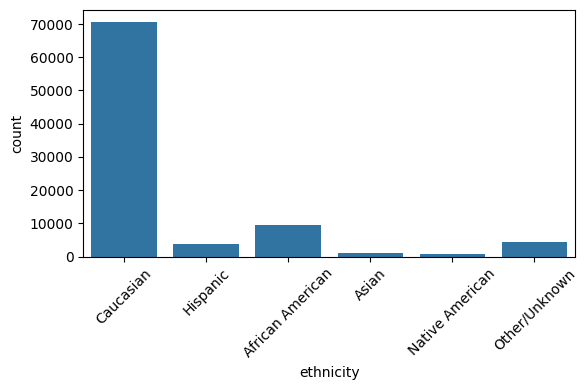

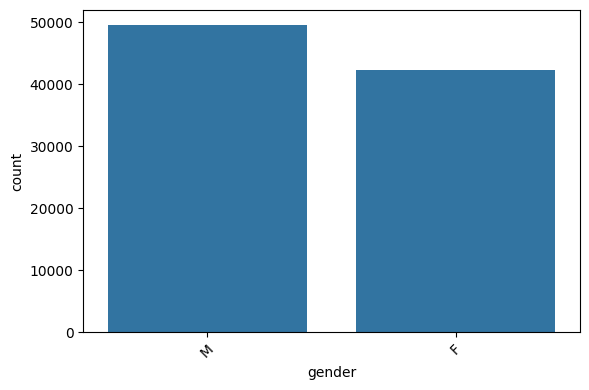

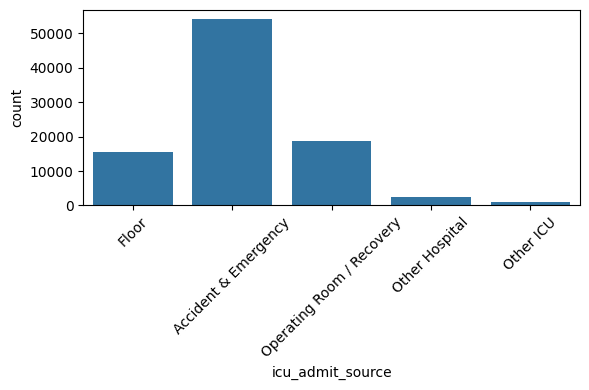

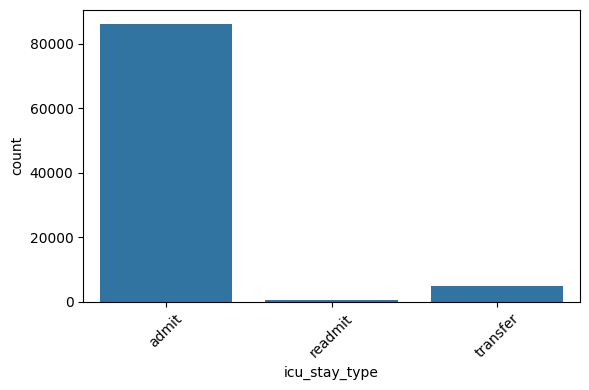

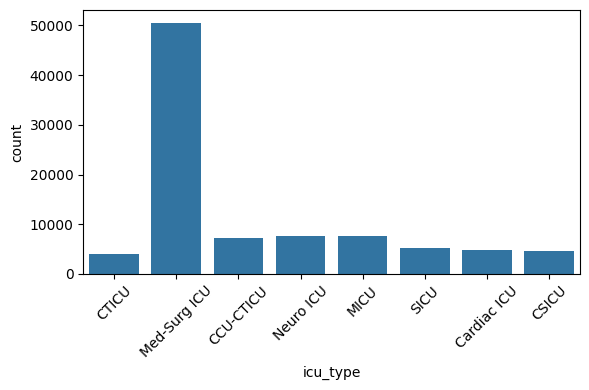

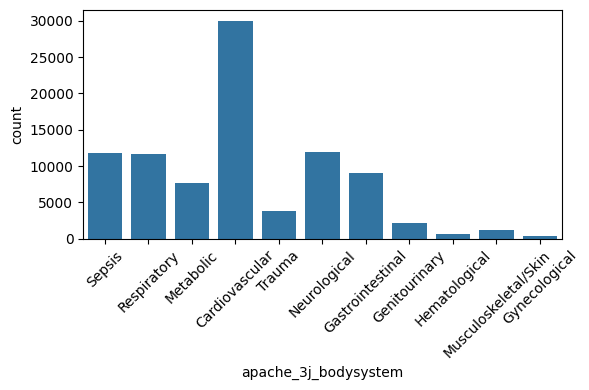

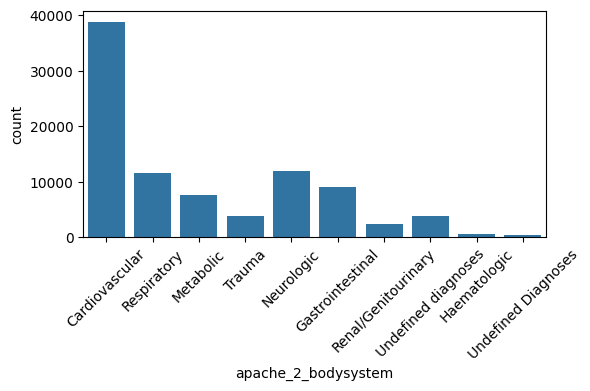

In [11]:
#Plot the categorical columns
for col in original_categorical_cols:
    fig, ax = plt.subplots(figsize=(6, 4))
    sns.countplot(x=col, data=df, ax=ax)
    ax.tick_params(axis='x', labelrotation=45)   # or rotation=45 on older mpl
    plt.tight_layout()
    plt.show()


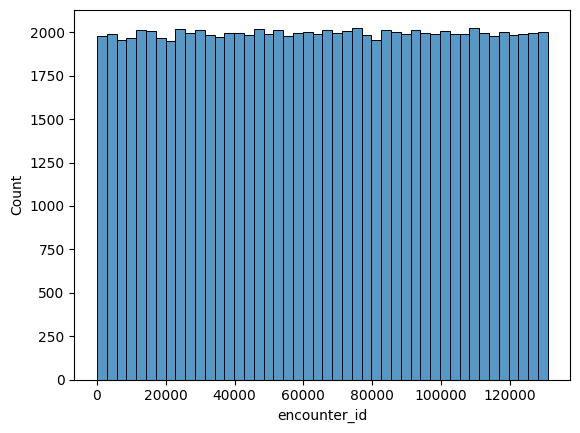

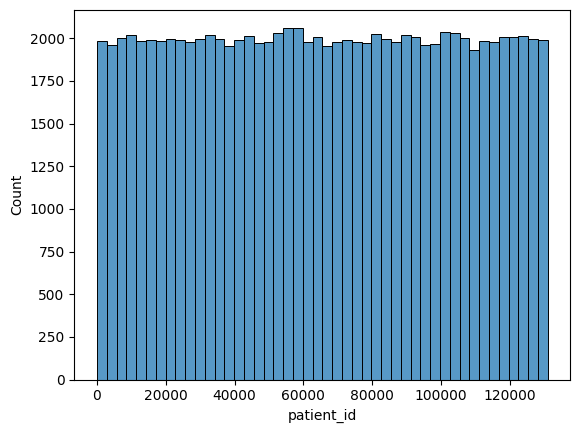

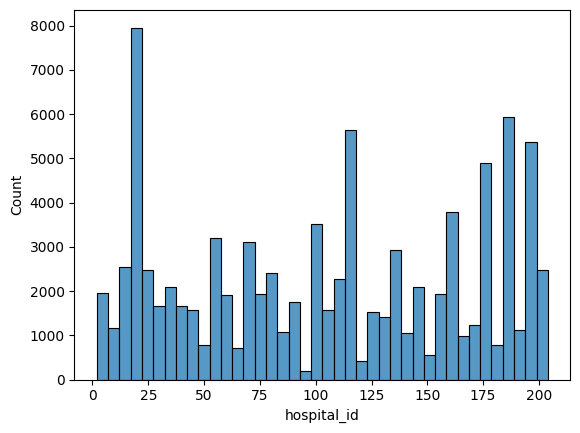

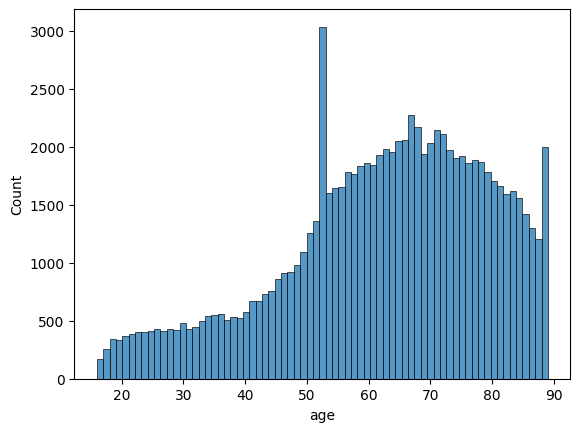

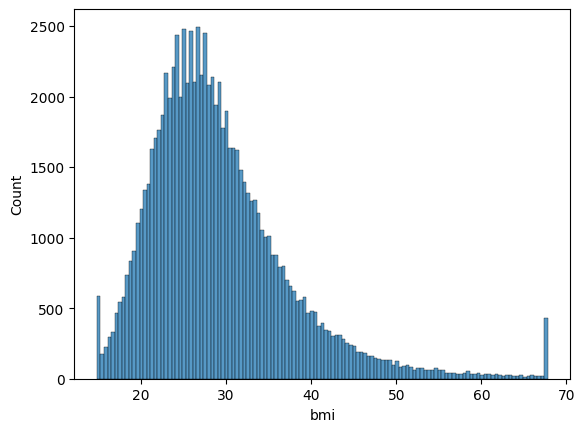

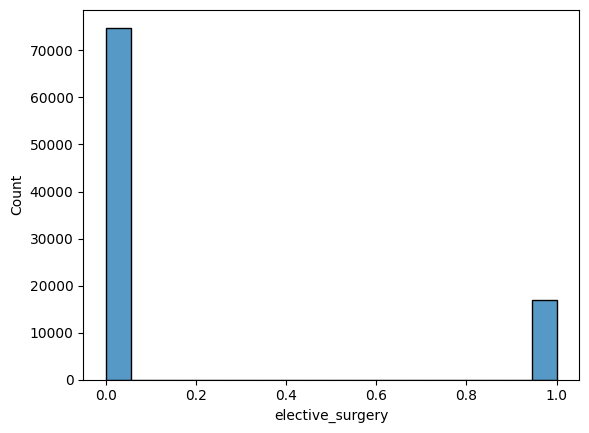

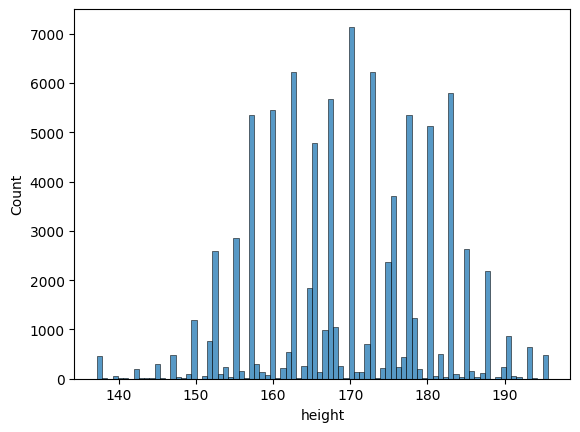

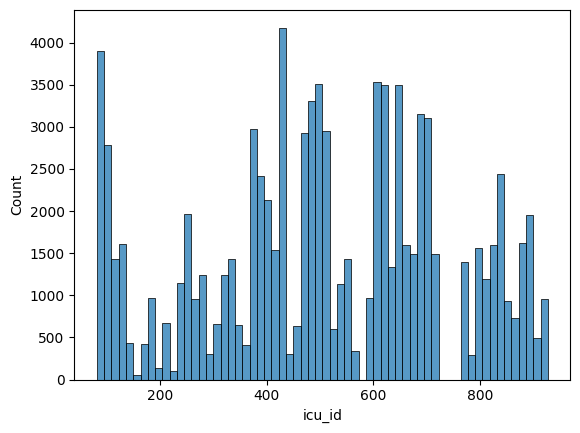

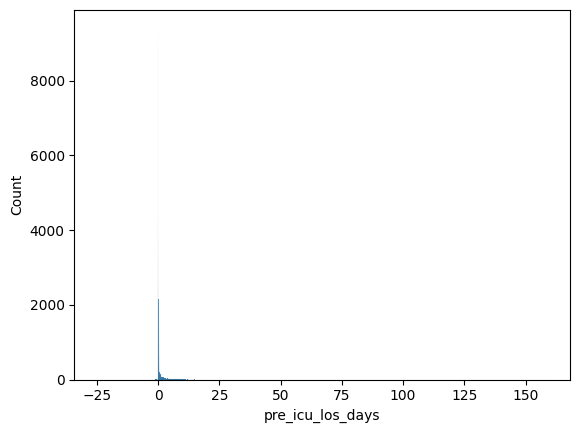

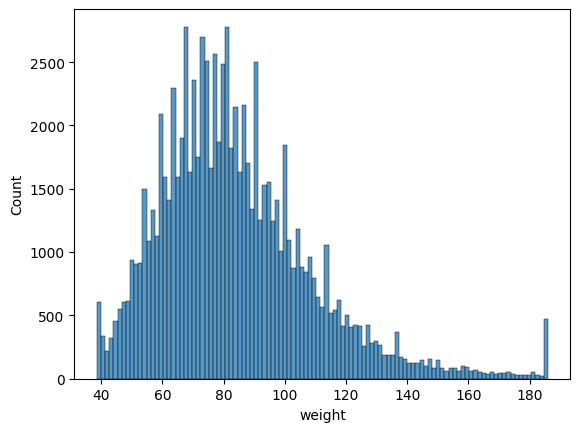

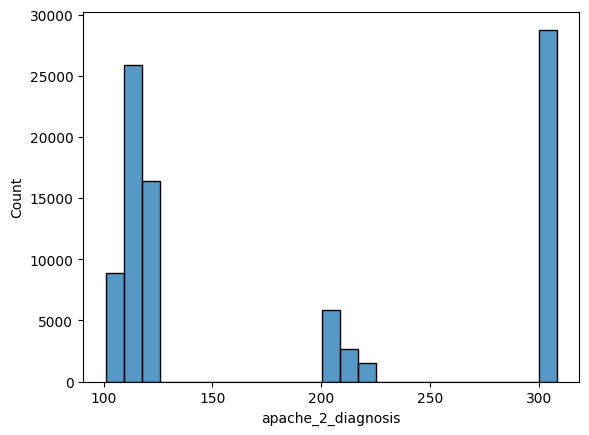

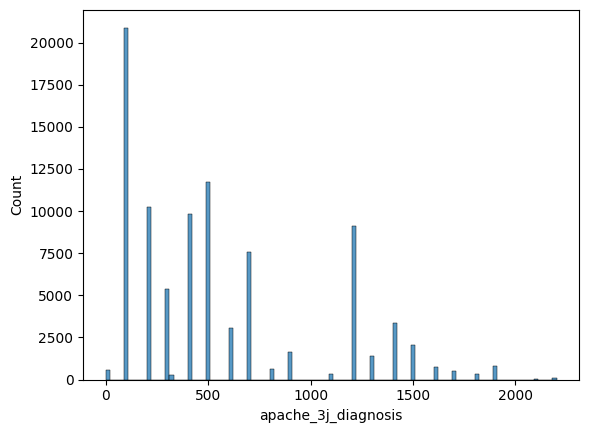

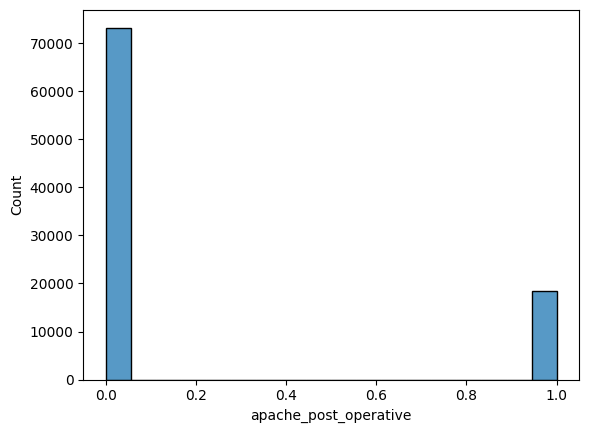

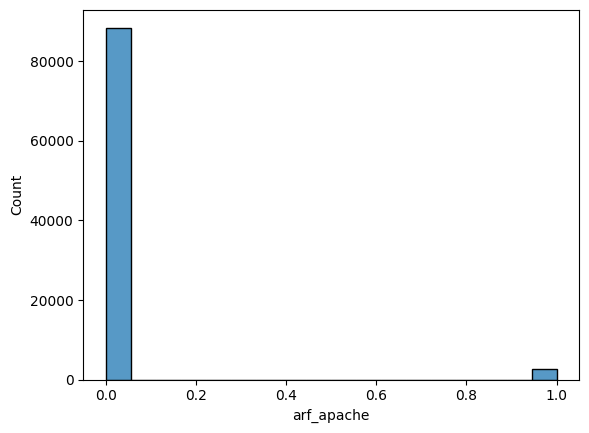

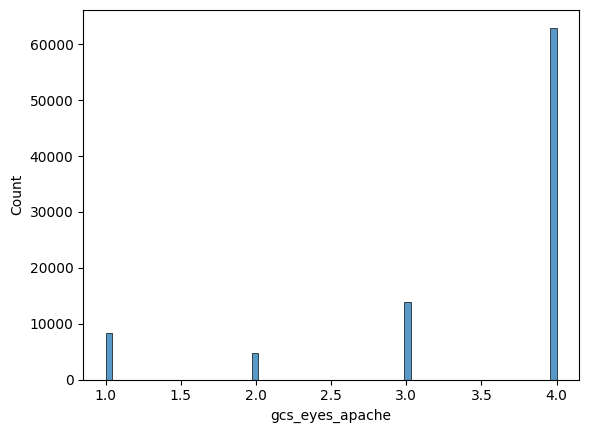

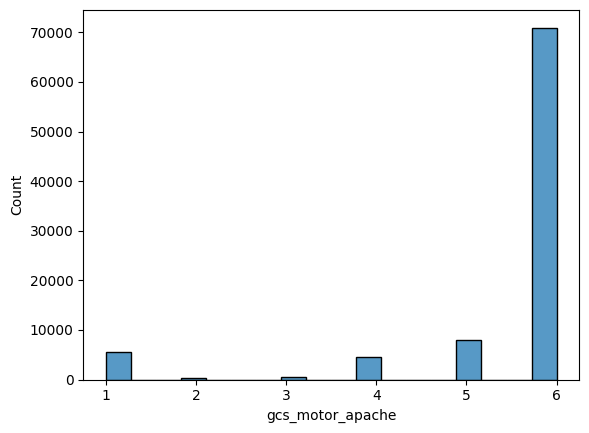

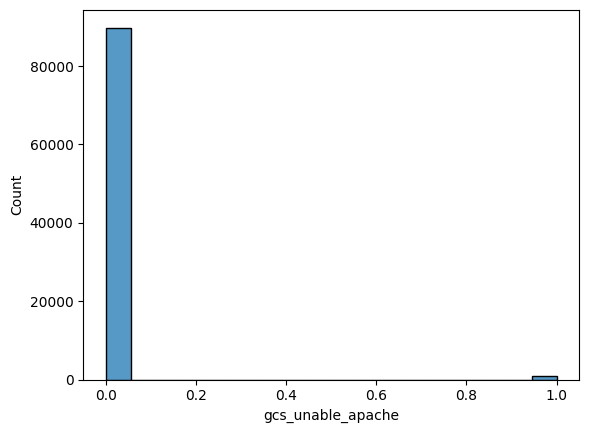

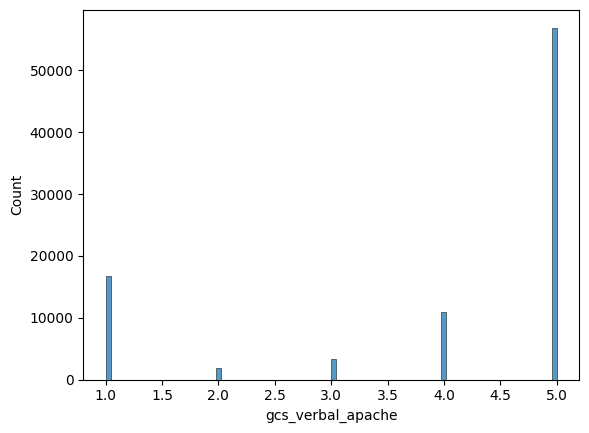

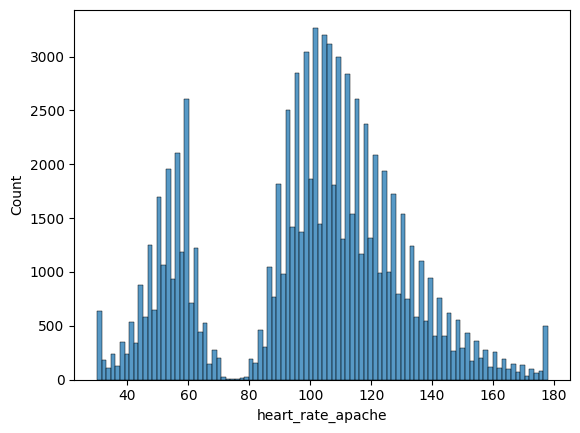

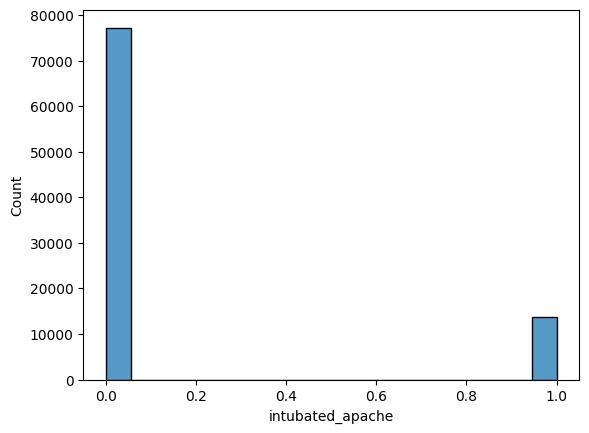

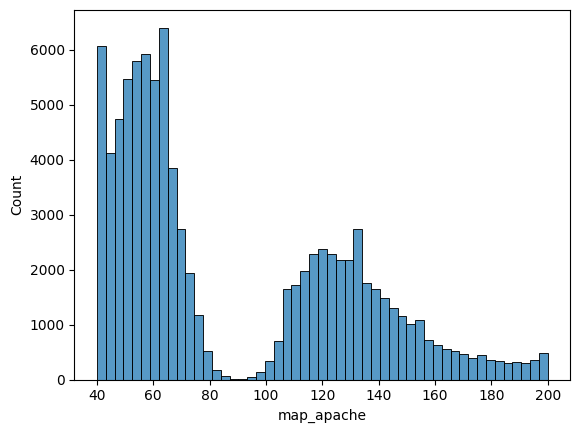

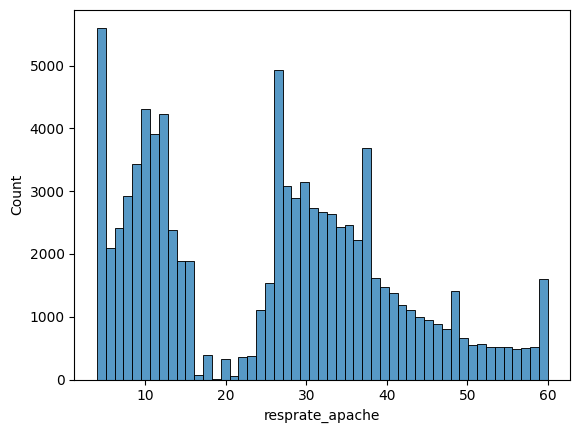

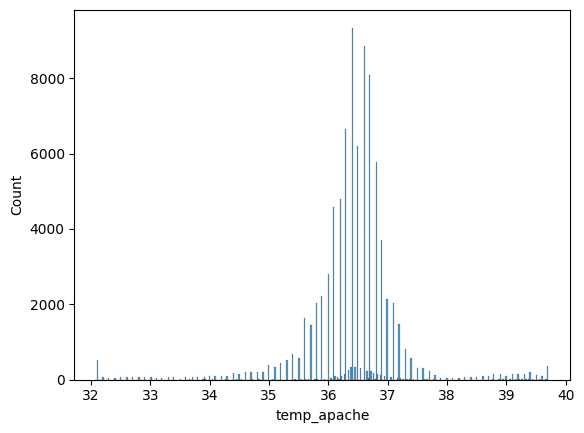

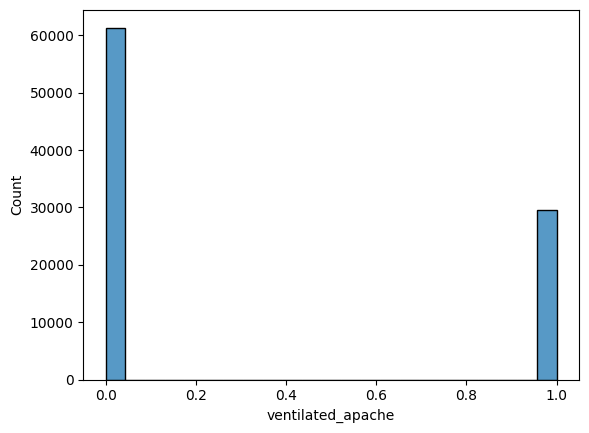

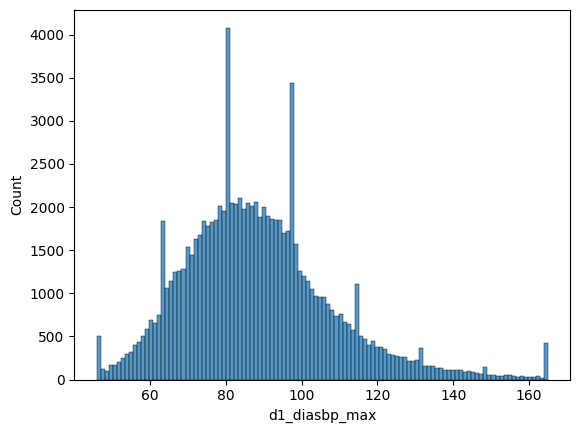

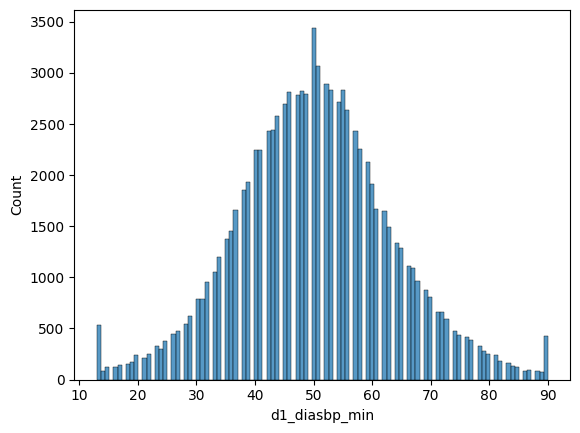

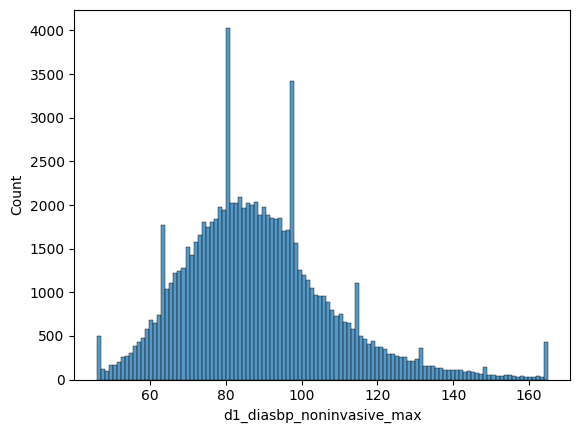

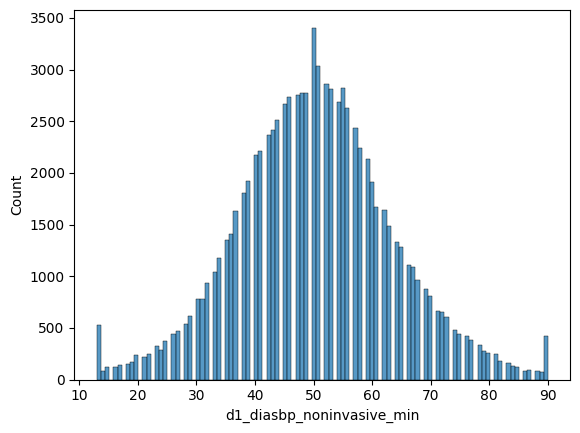

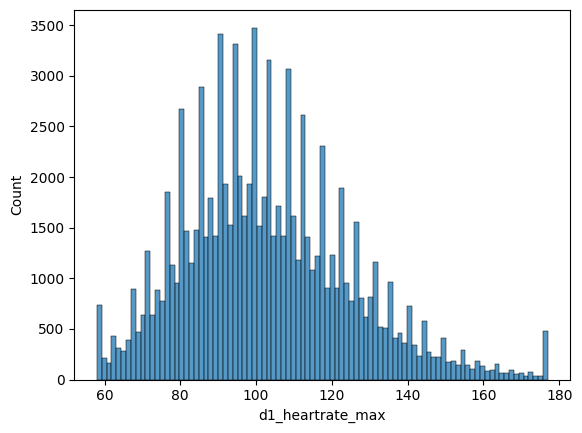

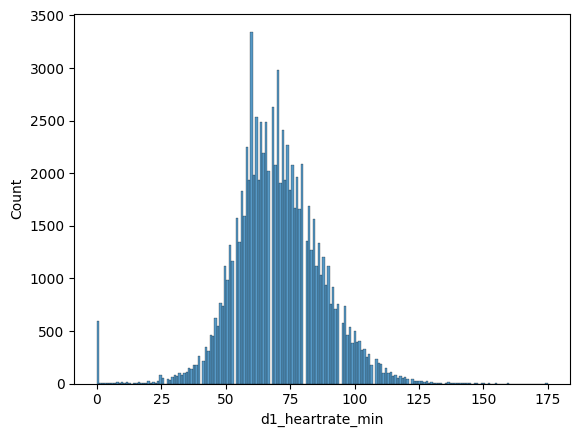

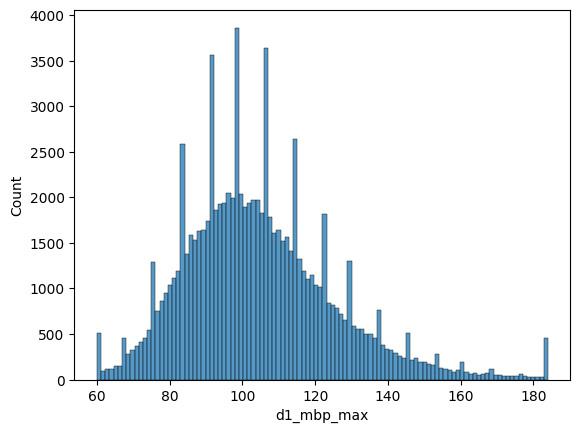

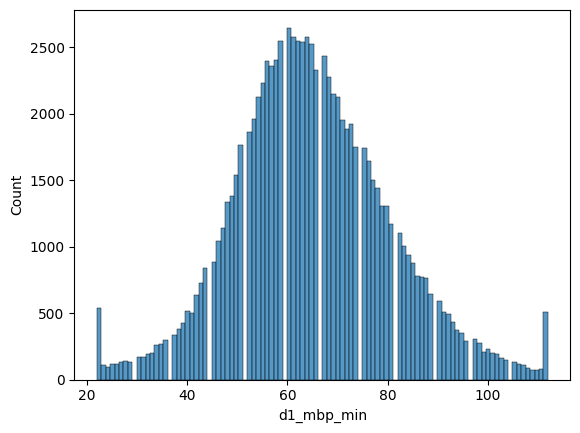

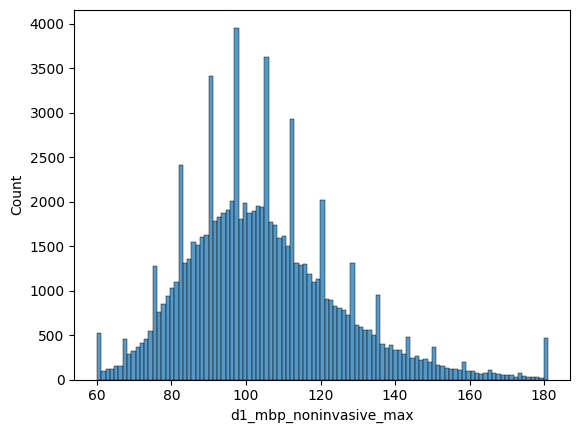

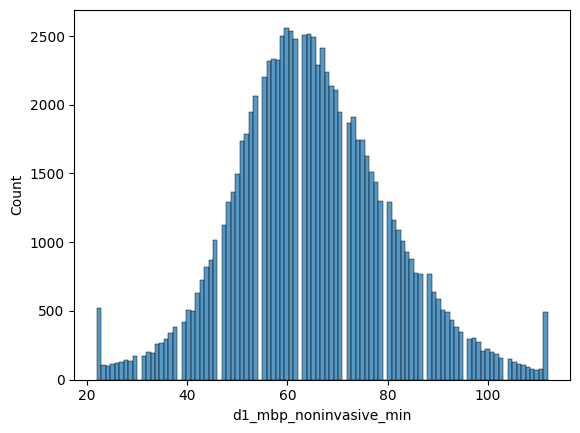

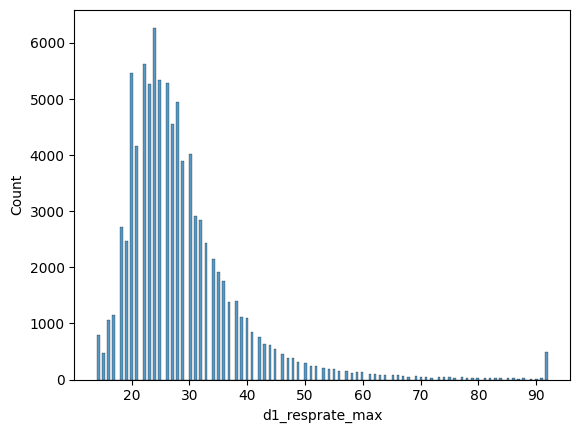

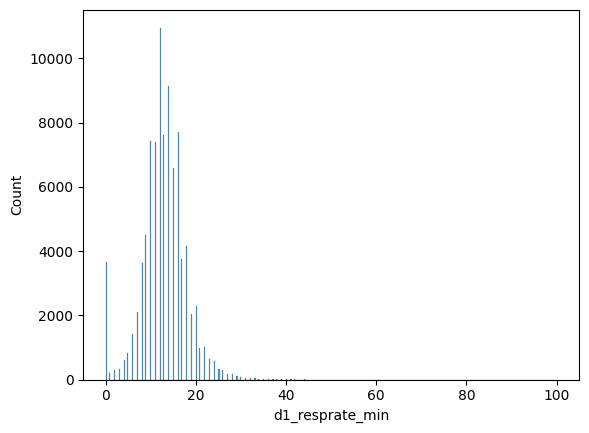

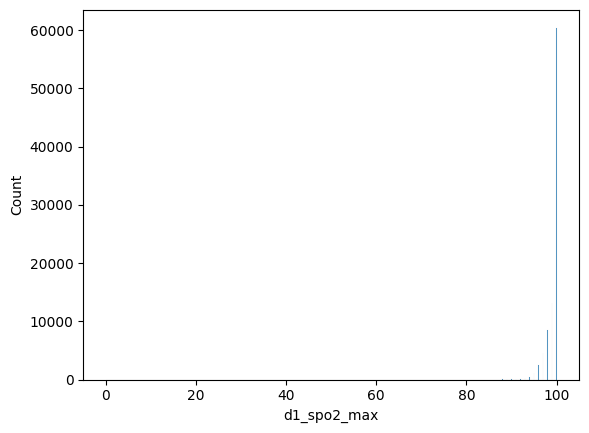

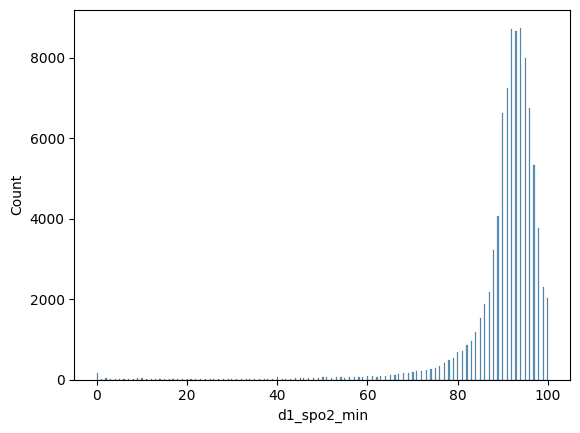

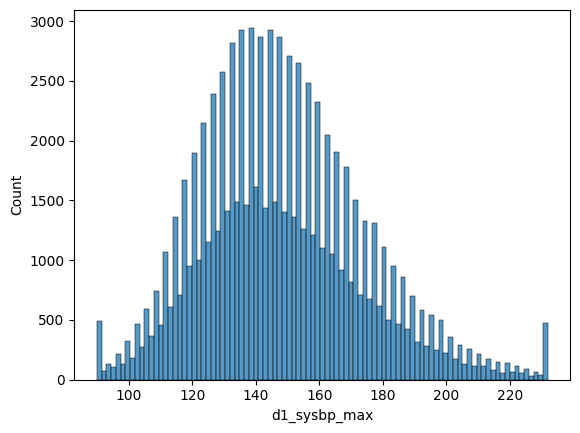

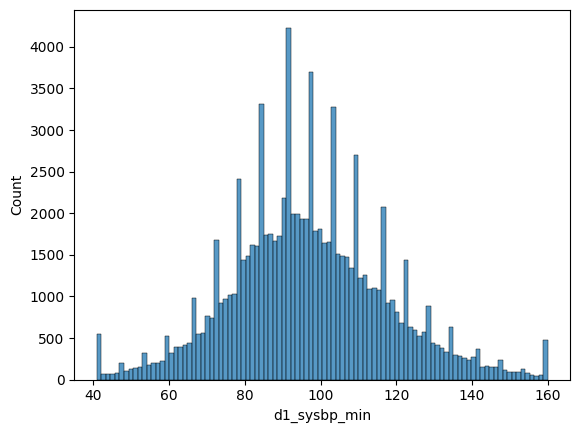

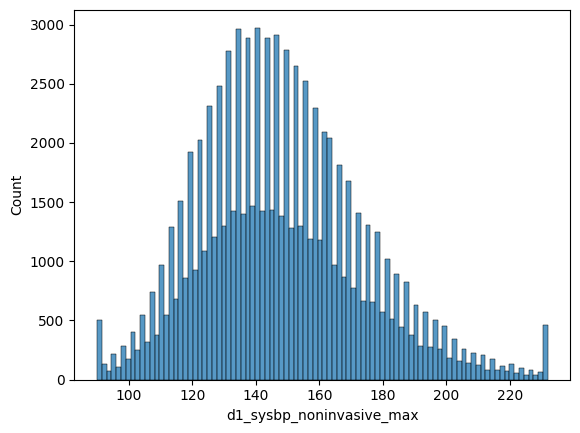

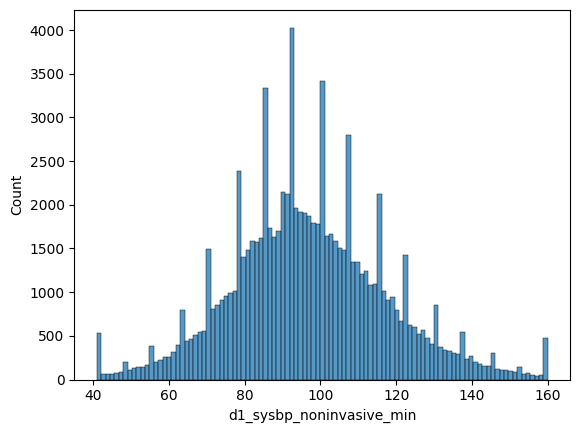

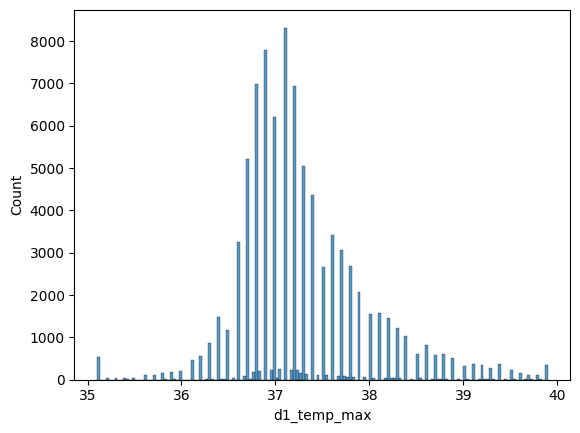

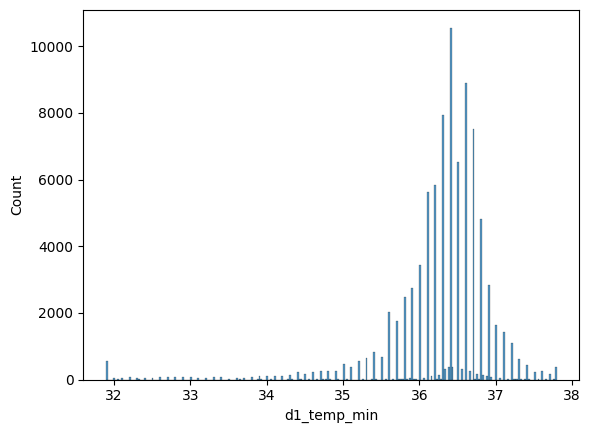

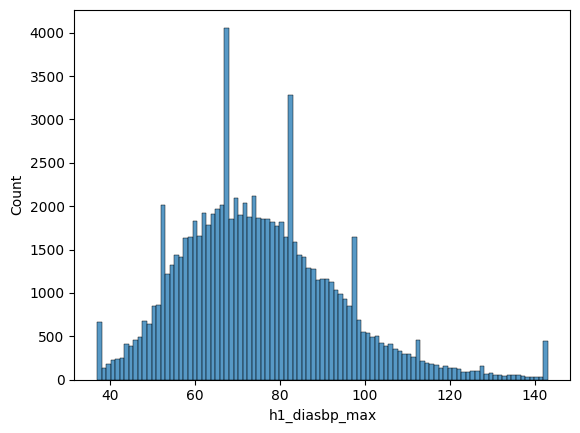

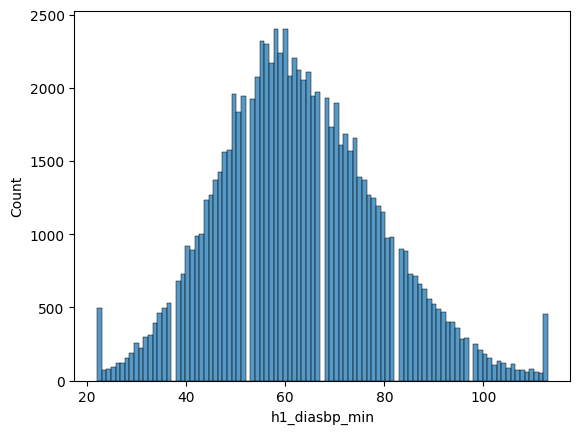

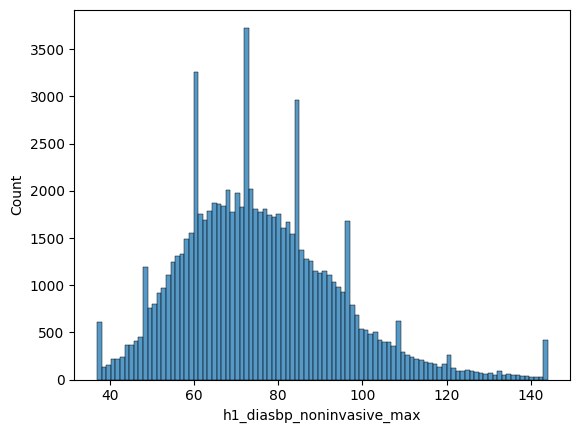

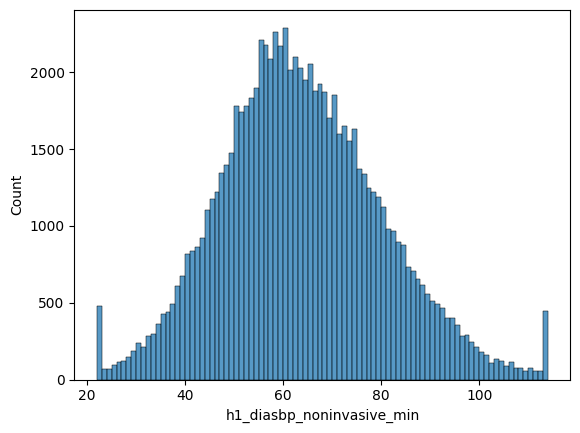

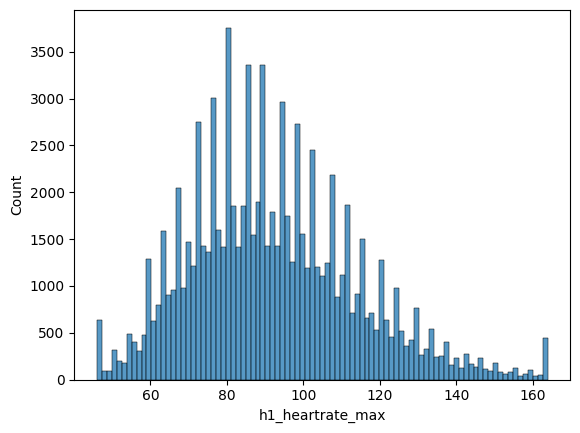

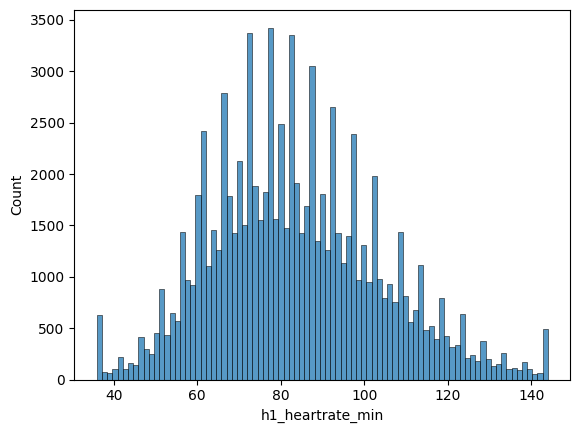

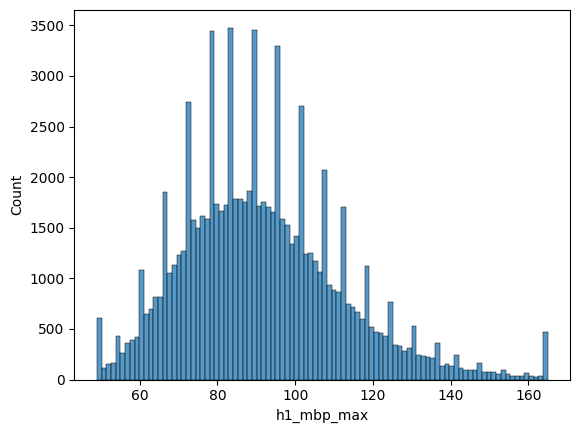

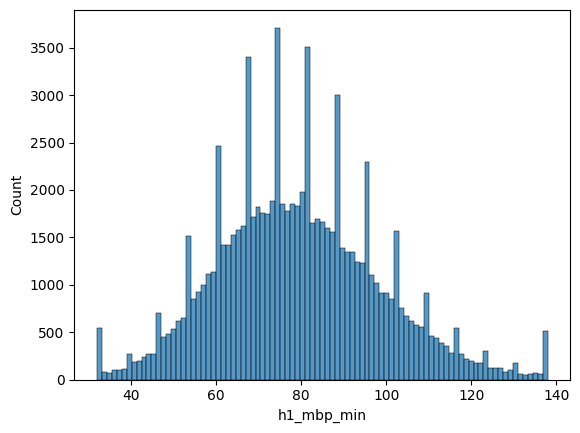

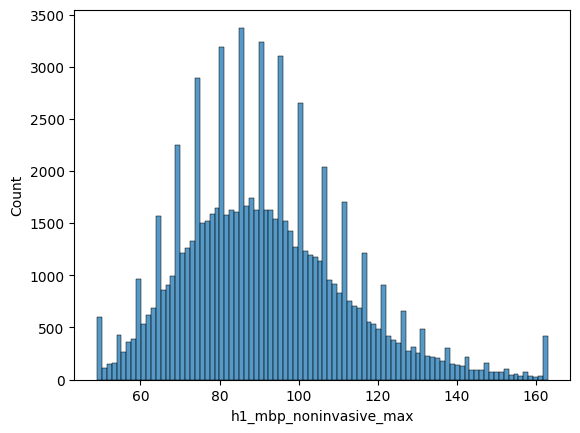

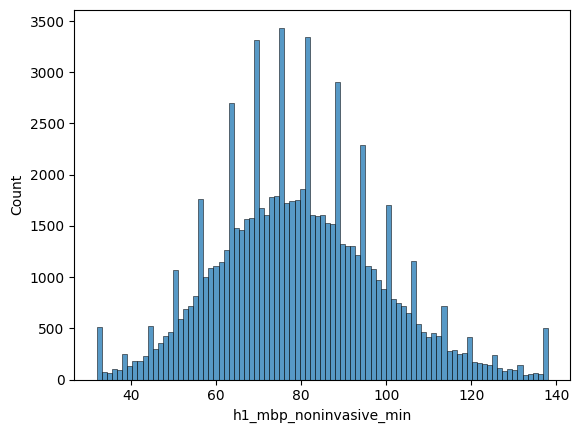

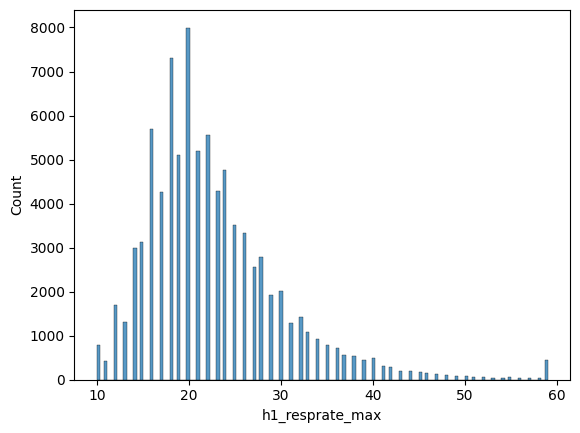

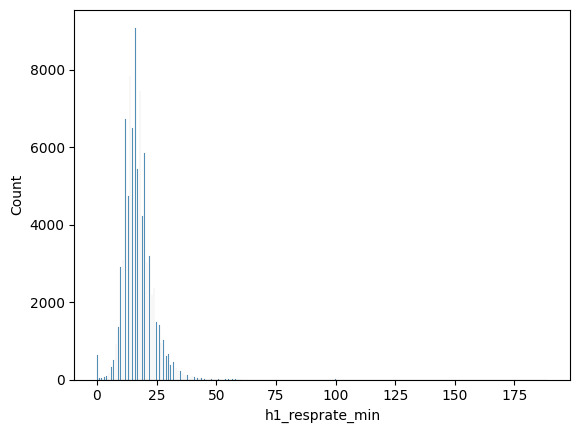

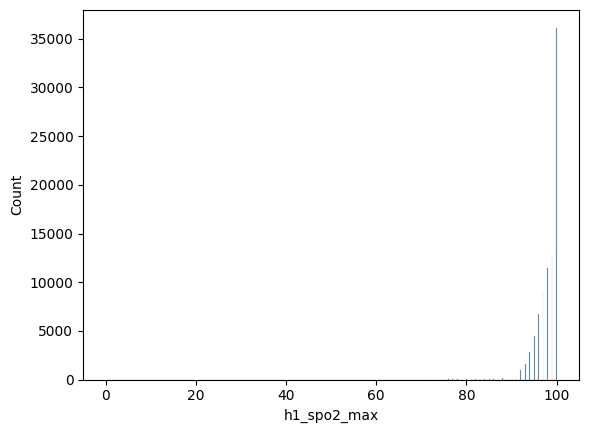

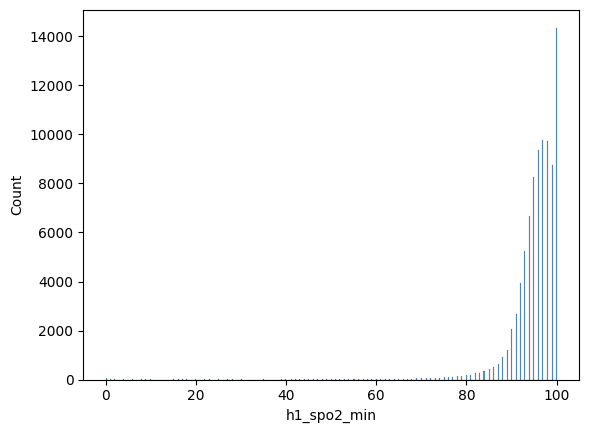

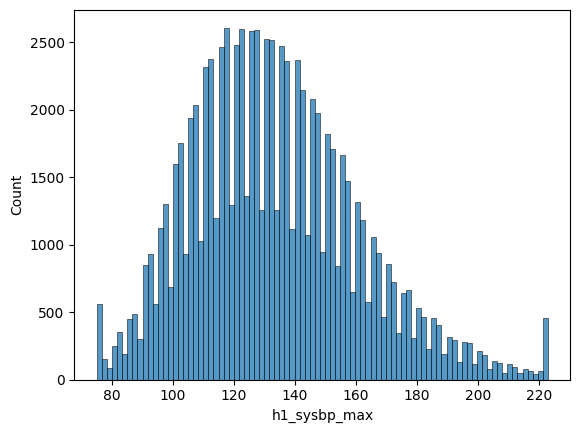

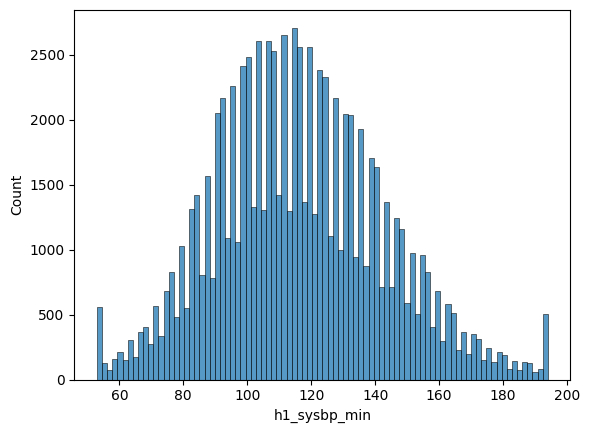

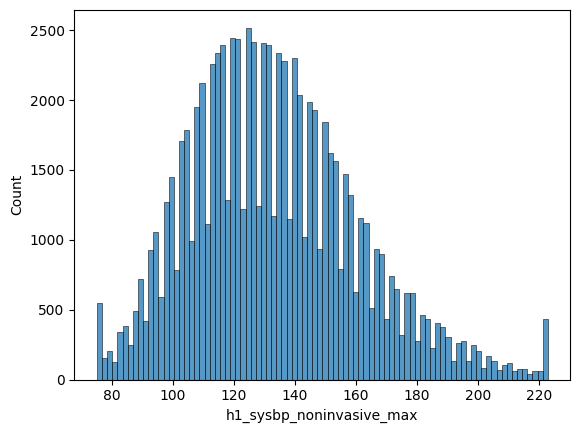

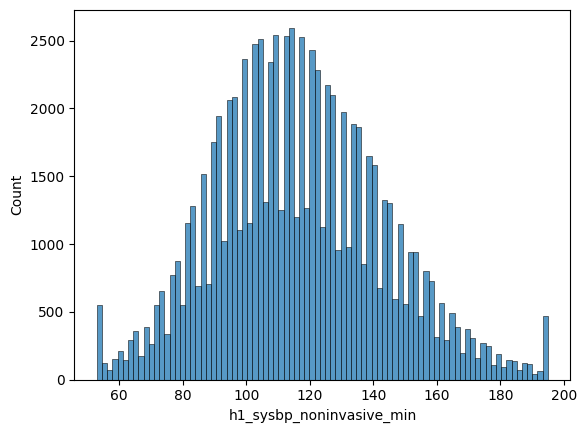

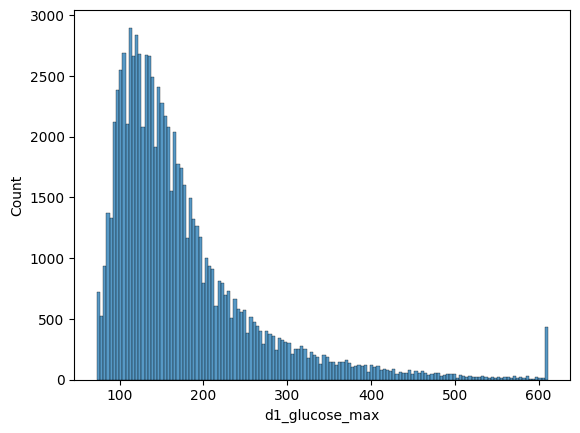

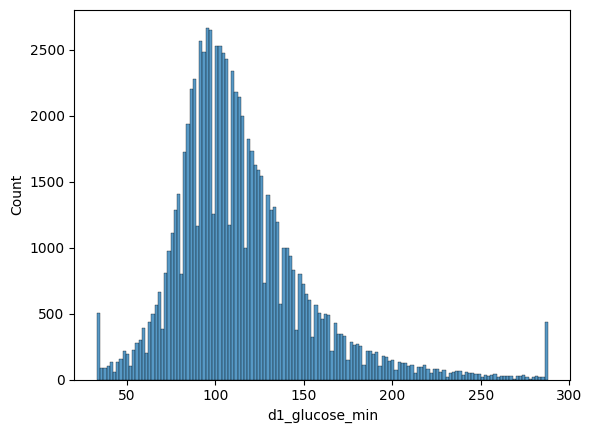

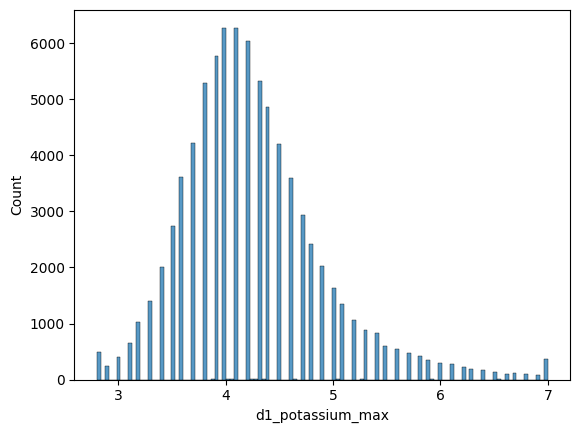

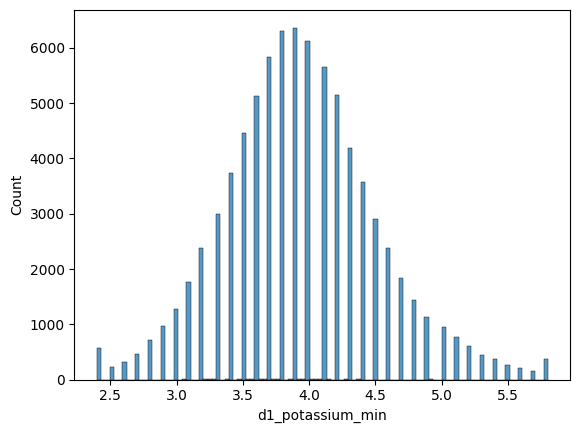

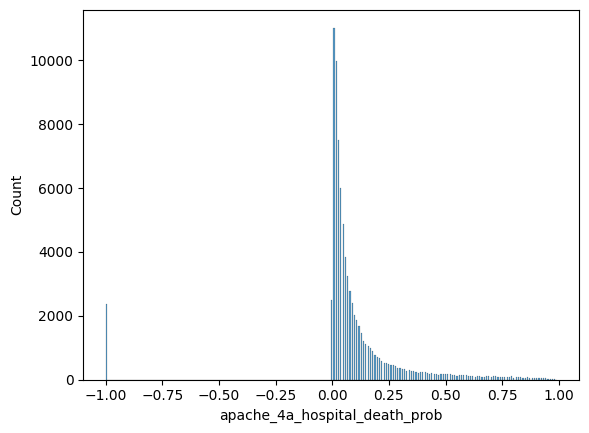

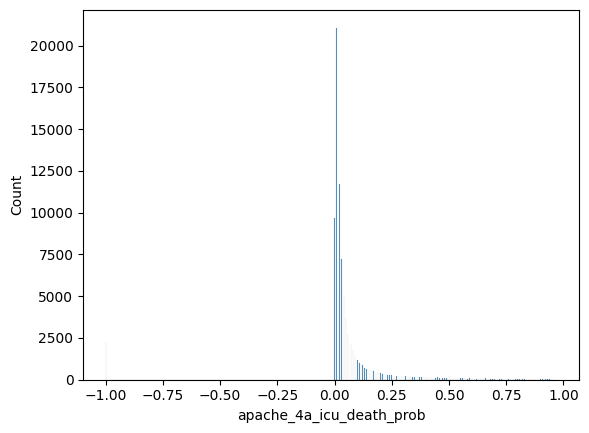

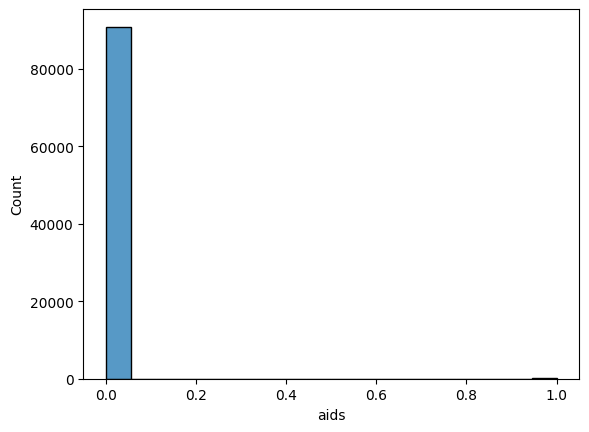

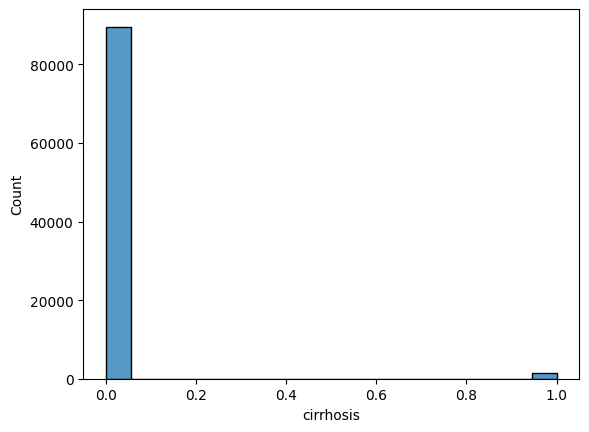

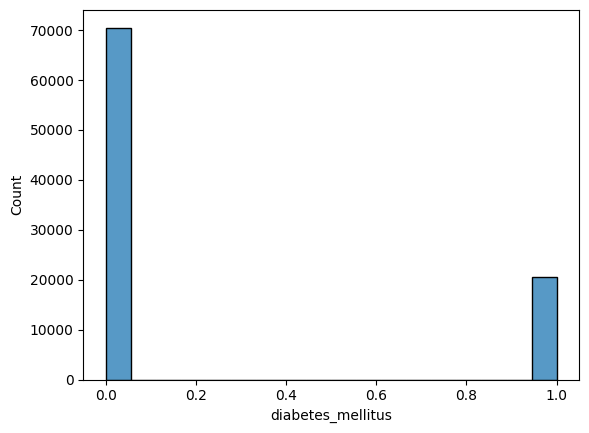

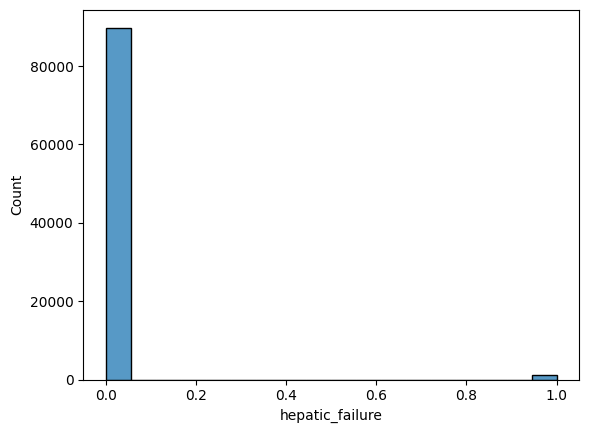

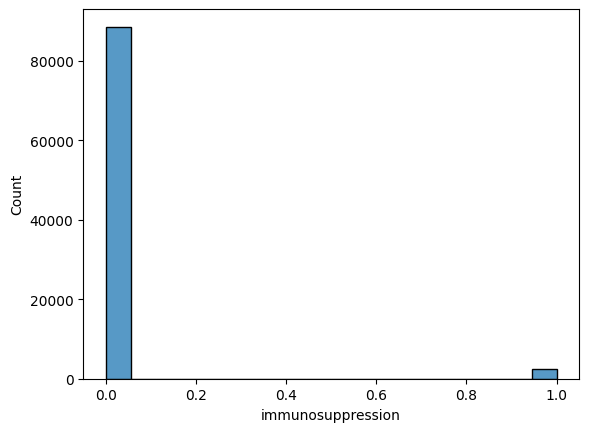

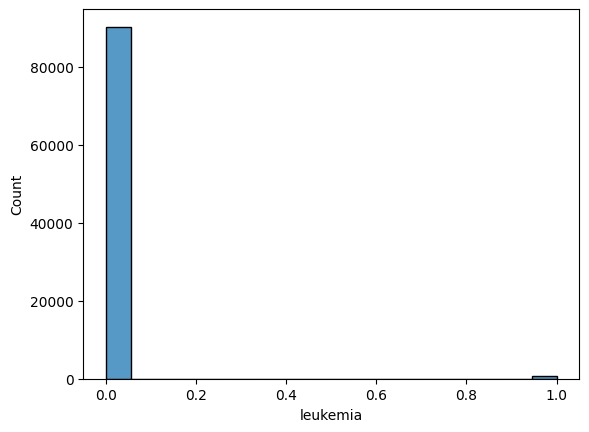

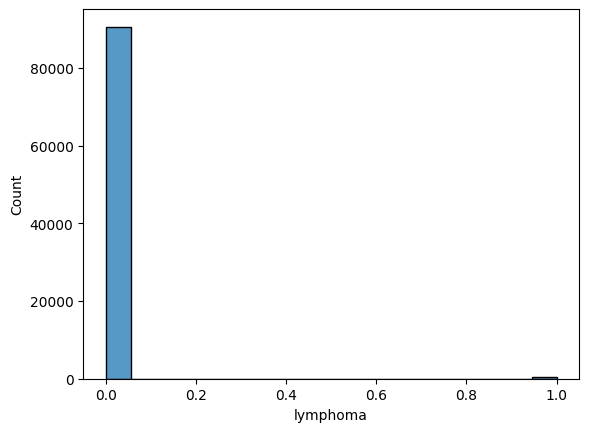

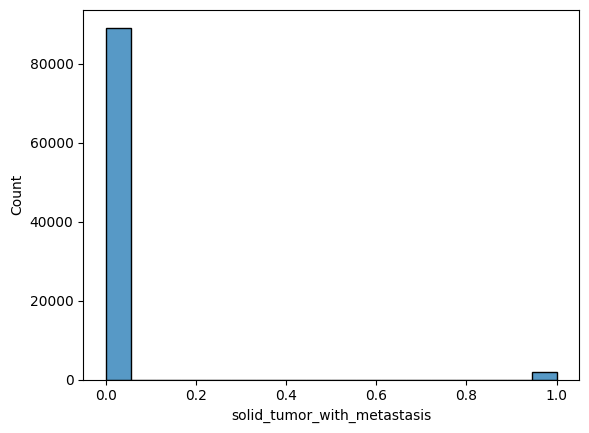

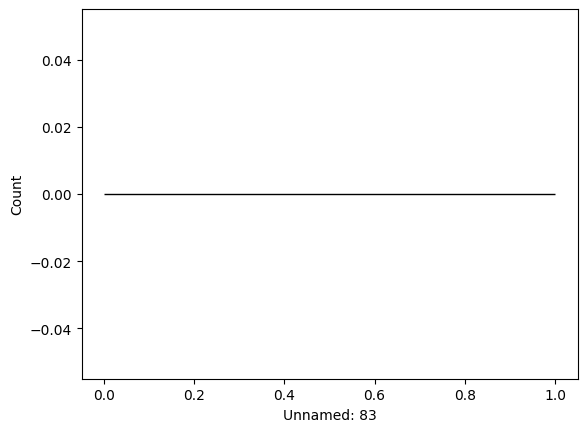

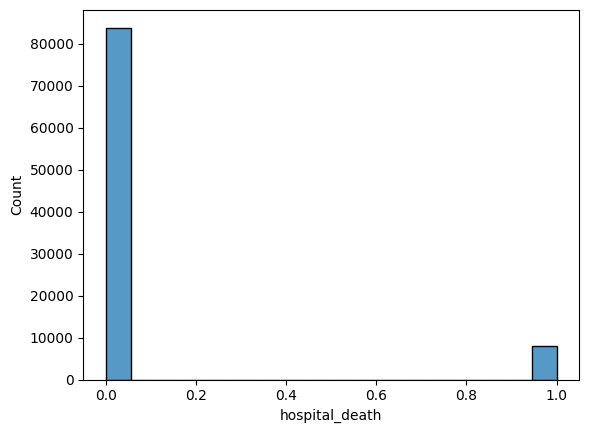

In [12]:
#Plot Numerical columns
for col in original_numerical_cols:
    sns.histplot(df[col])
    plt.show()

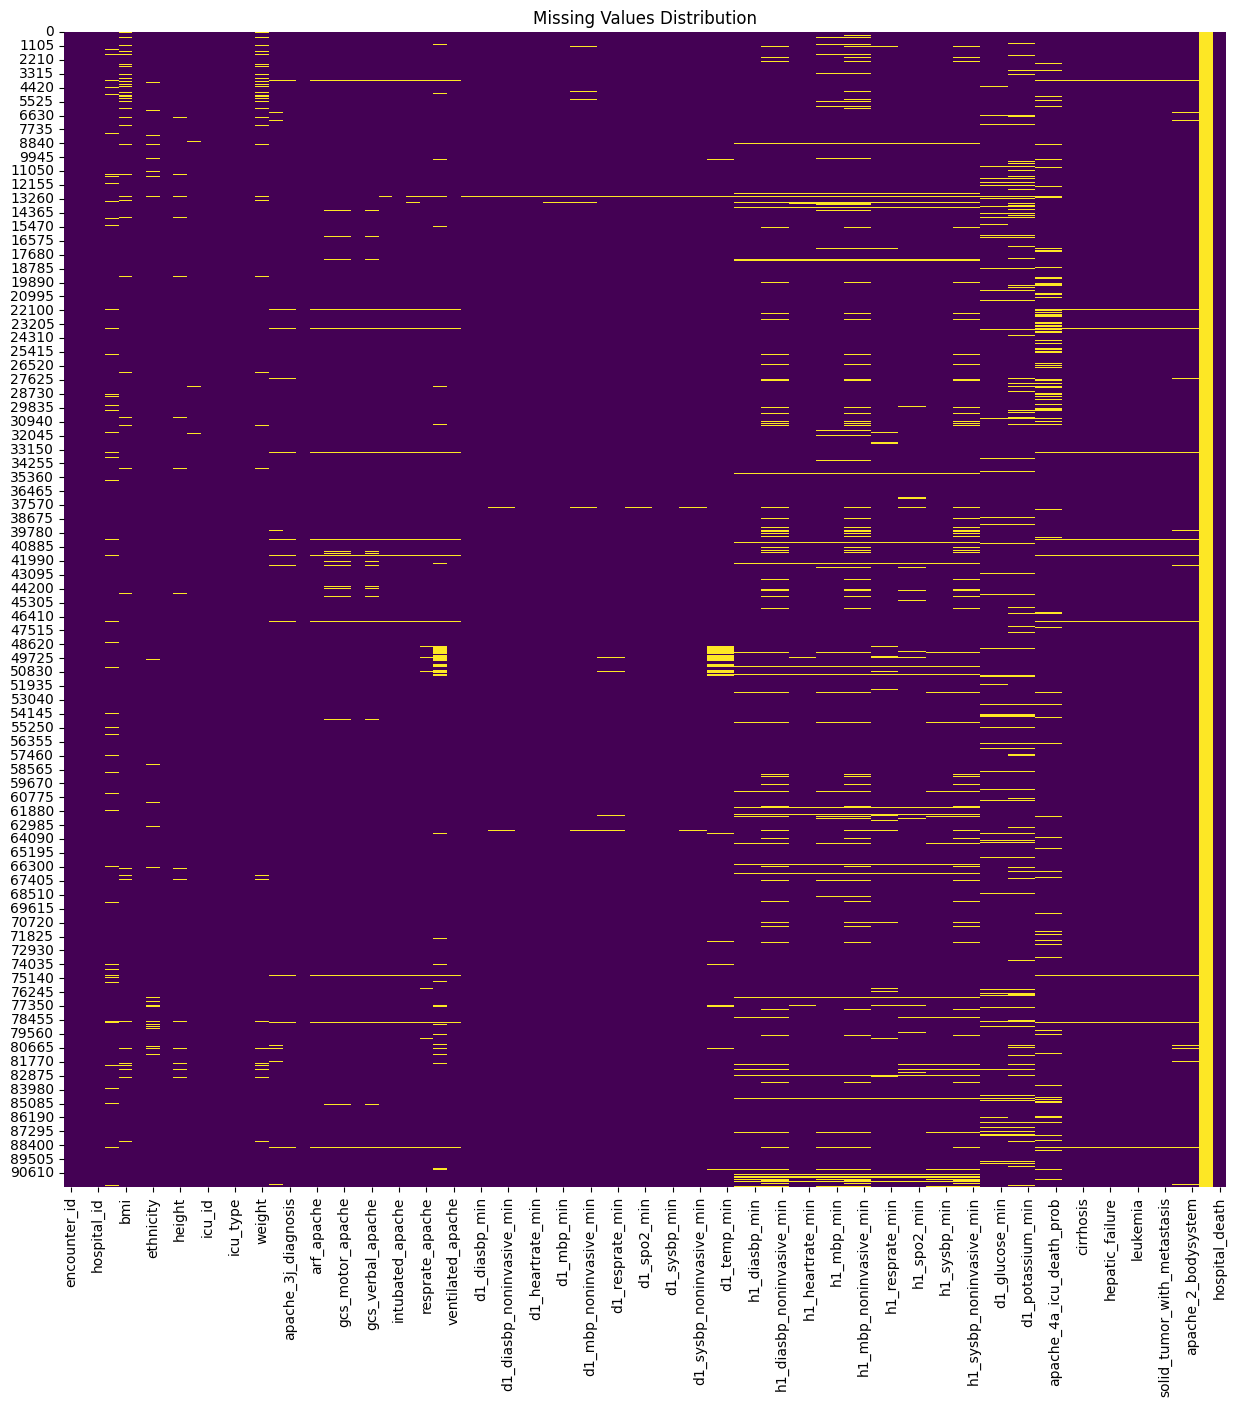

In [13]:
#Null Values Distribution
plt.figure(figsize=(15, 15))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False)
plt.title('Missing Values Distribution')
plt.show()


In [13]:
# Seeing the columns with null values only:
def null_value_column(A):
    null_list = []
    for col in A.columns:
        if A[col].isnull().sum()>0:
            null_list.append(col)
    return null_list

In [14]:
null_value_column(df)

['age',
 'bmi',
 'ethnicity',
 'gender',
 'height',
 'icu_admit_source',
 'weight',
 'apache_2_diagnosis',
 'apache_3j_diagnosis',
 'arf_apache',
 'gcs_eyes_apache',
 'gcs_motor_apache',
 'gcs_unable_apache',
 'gcs_verbal_apache',
 'heart_rate_apache',
 'intubated_apache',
 'map_apache',
 'resprate_apache',
 'temp_apache',
 'ventilated_apache',
 'd1_diasbp_max',
 'd1_diasbp_min',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_heartrate_max',
 'd1_heartrate_min',
 'd1_mbp_max',
 'd1_mbp_min',
 'd1_mbp_noninvasive_max',
 'd1_mbp_noninvasive_min',
 'd1_resprate_max',
 'd1_resprate_min',
 'd1_spo2_max',
 'd1_spo2_min',
 'd1_sysbp_max',
 'd1_sysbp_min',
 'd1_sysbp_noninvasive_max',
 'd1_sysbp_noninvasive_min',
 'd1_temp_max',
 'd1_temp_min',
 'h1_diasbp_max',
 'h1_diasbp_min',
 'h1_diasbp_noninvasive_max',
 'h1_diasbp_noninvasive_min',
 'h1_heartrate_max',
 'h1_heartrate_min',
 'h1_mbp_max',
 'h1_mbp_min',
 'h1_mbp_noninvasive_max',
 'h1_mbp_noninvasive_min',
 'h1_resprate

In [14]:
'''There exists a column that is unnamed so we don't know about the data.
So I am planning to drop it'''
unnamed_cols = df.columns[df.columns.str.contains('Unnamed')]
df.drop(unnamed_cols, axis=1, inplace=True)

In [15]:
'''There are some columns which are not of that much use when we want to predict the Survival Rate,so dropping them at once'''
df.drop(['ethnicity', 'icu_admit_source', 'icu_id', 'icu_stay_type', 'icu_type', 'encounter_id', 'patient_id', 'hospital_id'], inplace=True, axis=1)

In [16]:
# Seeing the percentage of missing values in each column and storing it in a dictionary:
def percentage_of_missing_values(A):
    num_rows = A.shape[0]
    results = {}
    for col in A.columns:
        null_count = A[col].isnull().sum()
        if null_count > 0:
            percentage = (null_count / num_rows) * 100
            final_percentage = round(percentage,2)
            results[col] = final_percentage
    return results



In [17]:
missing_percent = percentage_of_missing_values(df)
print(missing_percent)

{'age': np.float64(4.61), 'bmi': np.float64(3.74), 'gender': np.float64(0.03), 'height': np.float64(1.45), 'weight': np.float64(2.97), 'apache_2_diagnosis': np.float64(1.81), 'apache_3j_diagnosis': np.float64(1.2), 'arf_apache': np.float64(0.78), 'gcs_eyes_apache': np.float64(2.07), 'gcs_motor_apache': np.float64(2.07), 'gcs_unable_apache': np.float64(1.13), 'gcs_verbal_apache': np.float64(2.07), 'heart_rate_apache': np.float64(0.96), 'intubated_apache': np.float64(0.78), 'map_apache': np.float64(1.08), 'resprate_apache': np.float64(1.35), 'temp_apache': np.float64(4.48), 'ventilated_apache': np.float64(0.78), 'd1_diasbp_max': np.float64(0.18), 'd1_diasbp_min': np.float64(0.18), 'd1_diasbp_noninvasive_max': np.float64(1.13), 'd1_diasbp_noninvasive_min': np.float64(1.13), 'd1_heartrate_max': np.float64(0.16), 'd1_heartrate_min': np.float64(0.16), 'd1_mbp_max': np.float64(0.24), 'd1_mbp_min': np.float64(0.24), 'd1_mbp_noninvasive_max': np.float64(1.61), 'd1_mbp_noninvasive_min': np.float

In [18]:
# Min and Max values in the dict.
import numpy as np
min_val = min(missing_percent.values())
max_val = max(missing_percent.values())

# Finding all columns with min/max
min_cols = [col for col, val in missing_percent.items() if val == min_val]
max_cols = [col for col, val in missing_percent.items() if val == max_val]

print(f"The minimum value is {min_val}, appearing in columns: {', '.join(min_cols)}.")
print(f"The maximum value is {max_val}, appearing in columns: {', '.join(max_cols)}.")


The minimum value is 0.03, appearing in columns: gender.
The maximum value is 10.45, appearing in columns: d1_potassium_max, d1_potassium_min.


In [19]:
'''There are not much missing values so we can imputate the data with it's mean or can simply drop it.-->
So the plan is to make 2 seperate datasets -->
1. Dropped Values.
2. Imputation with its mean,mode for objects or strings'''



"There are not much missing values so we can imputate the data with it's mean or can simply drop it.-->\nSo the plan is to make 2 seperate datasets -->\n1. Dropped Values.\n2. Imputation with its mean,mode for objects or strings"

In [20]:
df_dropped_values = df.copy()
df_imputated_values = df.copy()

In [21]:
#Imputation with the mean for int,float types and mode for string types.
def imputation(A):
    for col in A.columns:
        if A[col].dtype in ['int64', 'float64']:
            A[col] = A[col].fillna(A[col].mean())
        else:
            A[col] = A[col].fillna(A[col].mode()[0])
    return A



In [26]:
imputation(df_imputated_values)


,age,bmi,elective_surgery,gender,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,68.000000,22.730000,0,M,180.3,0.541667,73.90000,113.0,502.01,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0
1,77.000000,27.420000,0,F,160.0,0.927778,70.20000,108.0,203.01,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0
2,25.000000,31.950000,0,F,172.7,0.000694,95.30000,122.0,703.03,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0
3,81.000000,22.640000,1,F,165.1,0.000694,61.70000,203.0,1206.03,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0
4,19.000000,29.185818,0,M,188.0,0.073611,84.02834,119.0,601.01,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,75.000000,23.060250,0,M,177.8,0.298611,72.90000,113.0,501.06,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular,0
91709,56.000000,47.179671,0,F,183.0,0.120139,158.00000,113.0,501.05,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0
91710,48.000000,27.236914,0,M,170.2,0.046528,78.90000,123.0,702.01,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0
91711,62.309516,23.297481,0,F,154.9,0.081944,55.90000,108.0,203.01,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0


In [27]:
df_imputated_values.shape

(91713, 76)

In [28]:
#Dropping the values.
df_dropped_values = df_dropped_values.dropna()

In [29]:
df_dropped_values.shape

(57596, 76)

In [31]:
#One Hot encoding
categorical_cols = df_dropped_values.select_dtypes(include='object').columns
df_dropped_values = pd.get_dummies(df_dropped_values, columns=categorical_cols)

categorical_cols = df_imputated_values.select_dtypes(include='object').columns
df_imputated_values = pd.get_dummies(df_imputated_values, columns=categorical_cols)



In [32]:
#Saving the dataframes.
df_dropped_values.to_csv('df_dropped_values.csv',index=False)
df_imputated_values.to_csv('df_imputated_values.csv',index=False)